In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train_data.shape

(7352, 563)

In [5]:
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
train_data.Activity.value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [7]:
train_data['Activity'] = train_data['Activity'].astype('category')


In [8]:
print(train_data['Activity'].unique())


['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
Categories (6, object): ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


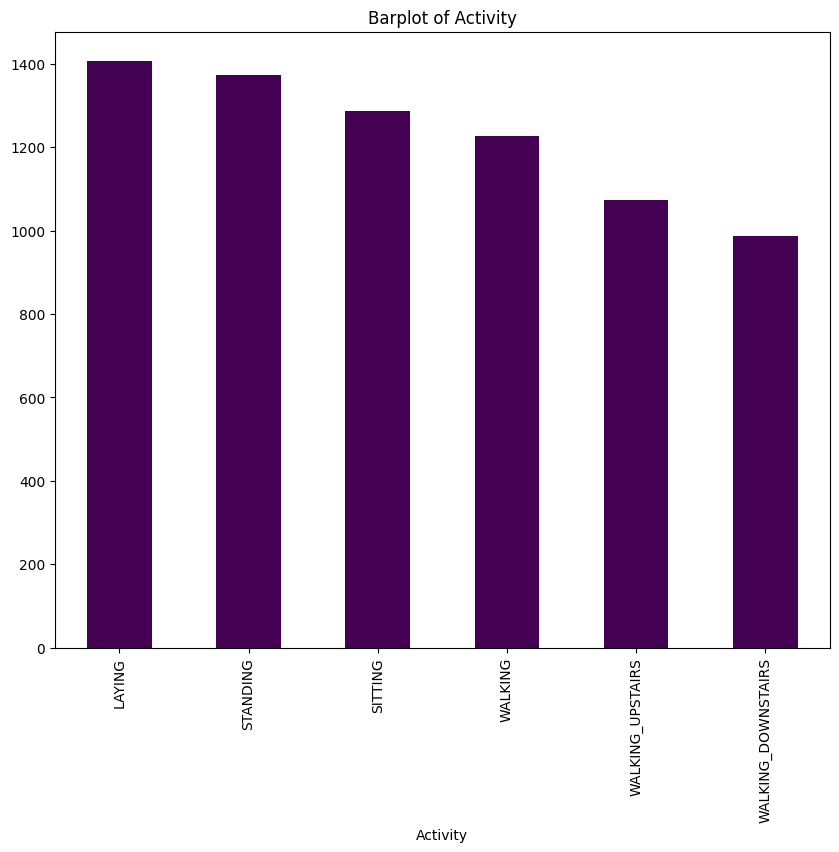

In [9]:
colormap = 'viridis'
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
train_data['Activity'].value_counts().plot(kind='bar', colormap = colormap)
plt.xticks(rotation=90)
plt.show()

In [10]:
test_data = pd.read_csv('test.csv')

In [11]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [12]:
test_data.shape

(2947, 563)

In [13]:
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [14]:
test_data.Activity.value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x241800dd510>,
 [Text(0.9246289077905214, 0.5958702735311667, 'LAYING'),
  Text(-0.15485784087840757, 1.089045017030278, 'SITTING'),
  Text(-1.0393322592014753, 0.3602616479493165, 'STANDING'),
  Text(-0.8280699520170185, -0.7240857370274139, 'WALKING'),
  Text(0.18960134430378683, -1.0835364923426423, 'WALKING_DOWNSTAIRS'),
  Text(0.9915739703260872, -0.4762153518858462, 'WALKING_UPSTAIRS')],
 [Text(0.5043430406130116, 0.3250201491988182, '18.22'),
  Text(-0.08446791320640411, 0.5940245547437878, '18.05'),
  Text(-0.5669085050189865, 0.1965063534268999, '16.83'),
  Text(-0.45167451928201, -0.3949558565604075, '16.66'),
  Text(0.10341891507479281, -0.5910199049141684, '15.98'),
  Text(0.5408585292687748, -0.2597538283013706, '14.25')])

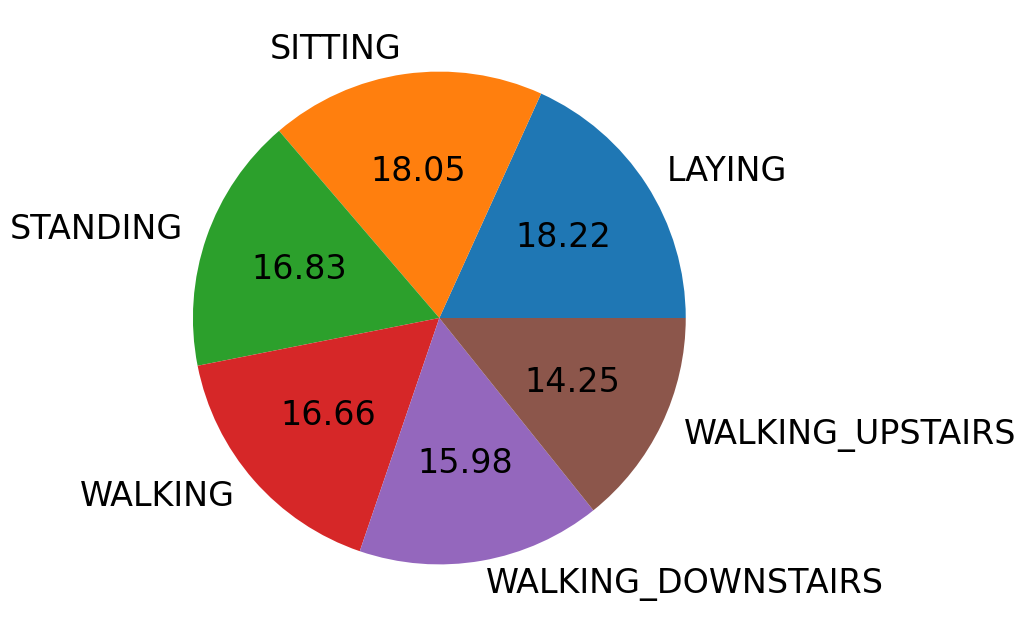

In [15]:
count_of_each_activity = np.array(test_data.Activity.value_counts())
activities = sorted(test_data.Activity.unique())
plt.rcParams.update({'figure.figsize': [8,8], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

# Exploratory Data Analysis

Uni Variate Data 

In [16]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


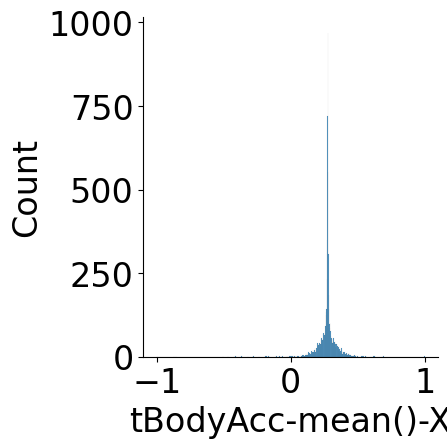

In [17]:
sns.displot(train_data['tBodyAcc-mean()-X'])

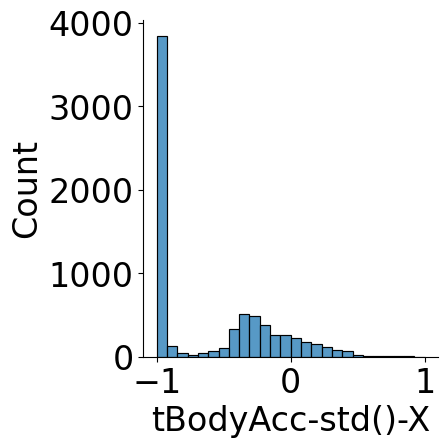

In [18]:
sns.displot(train_data['tBodyAcc-std()-X'])

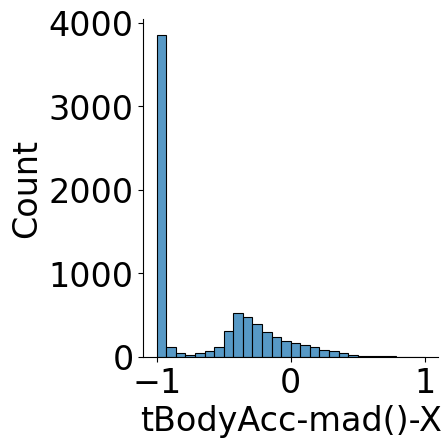

In [19]:
sns.displot(train_data['tBodyAcc-mad()-X'])

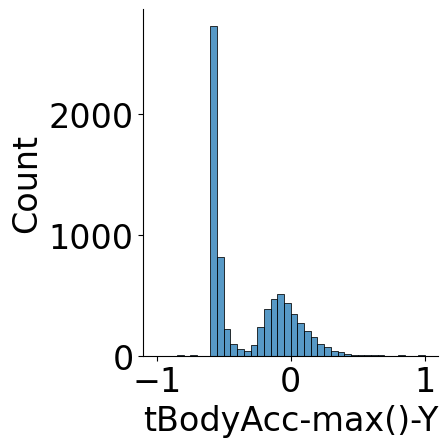

In [20]:
sns.displot(train_data['tBodyAcc-max()-Y'])

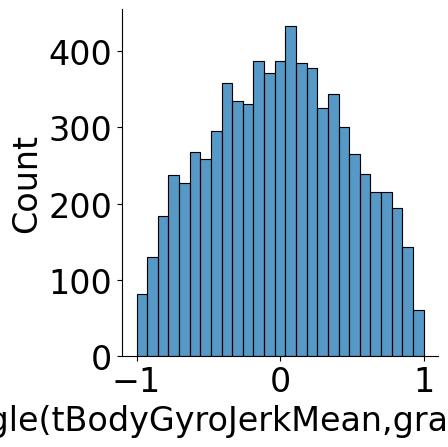

In [21]:
 sns.displot(train_data['angle(tBodyGyroJerkMean,gravityMean)'])

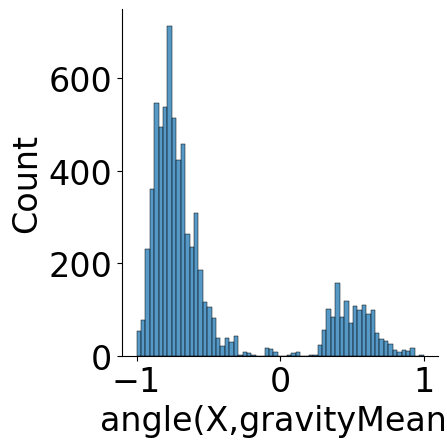

In [22]:
sns.displot(train_data['angle(X,gravityMean)'])

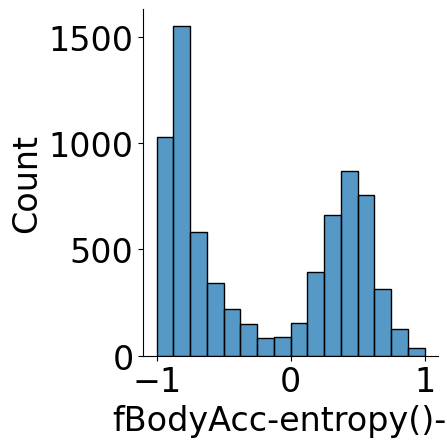

In [23]:
sns.displot(train_data['fBodyAcc-entropy()-Z'])

## Bi variate analysis

C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

Text(0.1, 9, 'Dynamic')

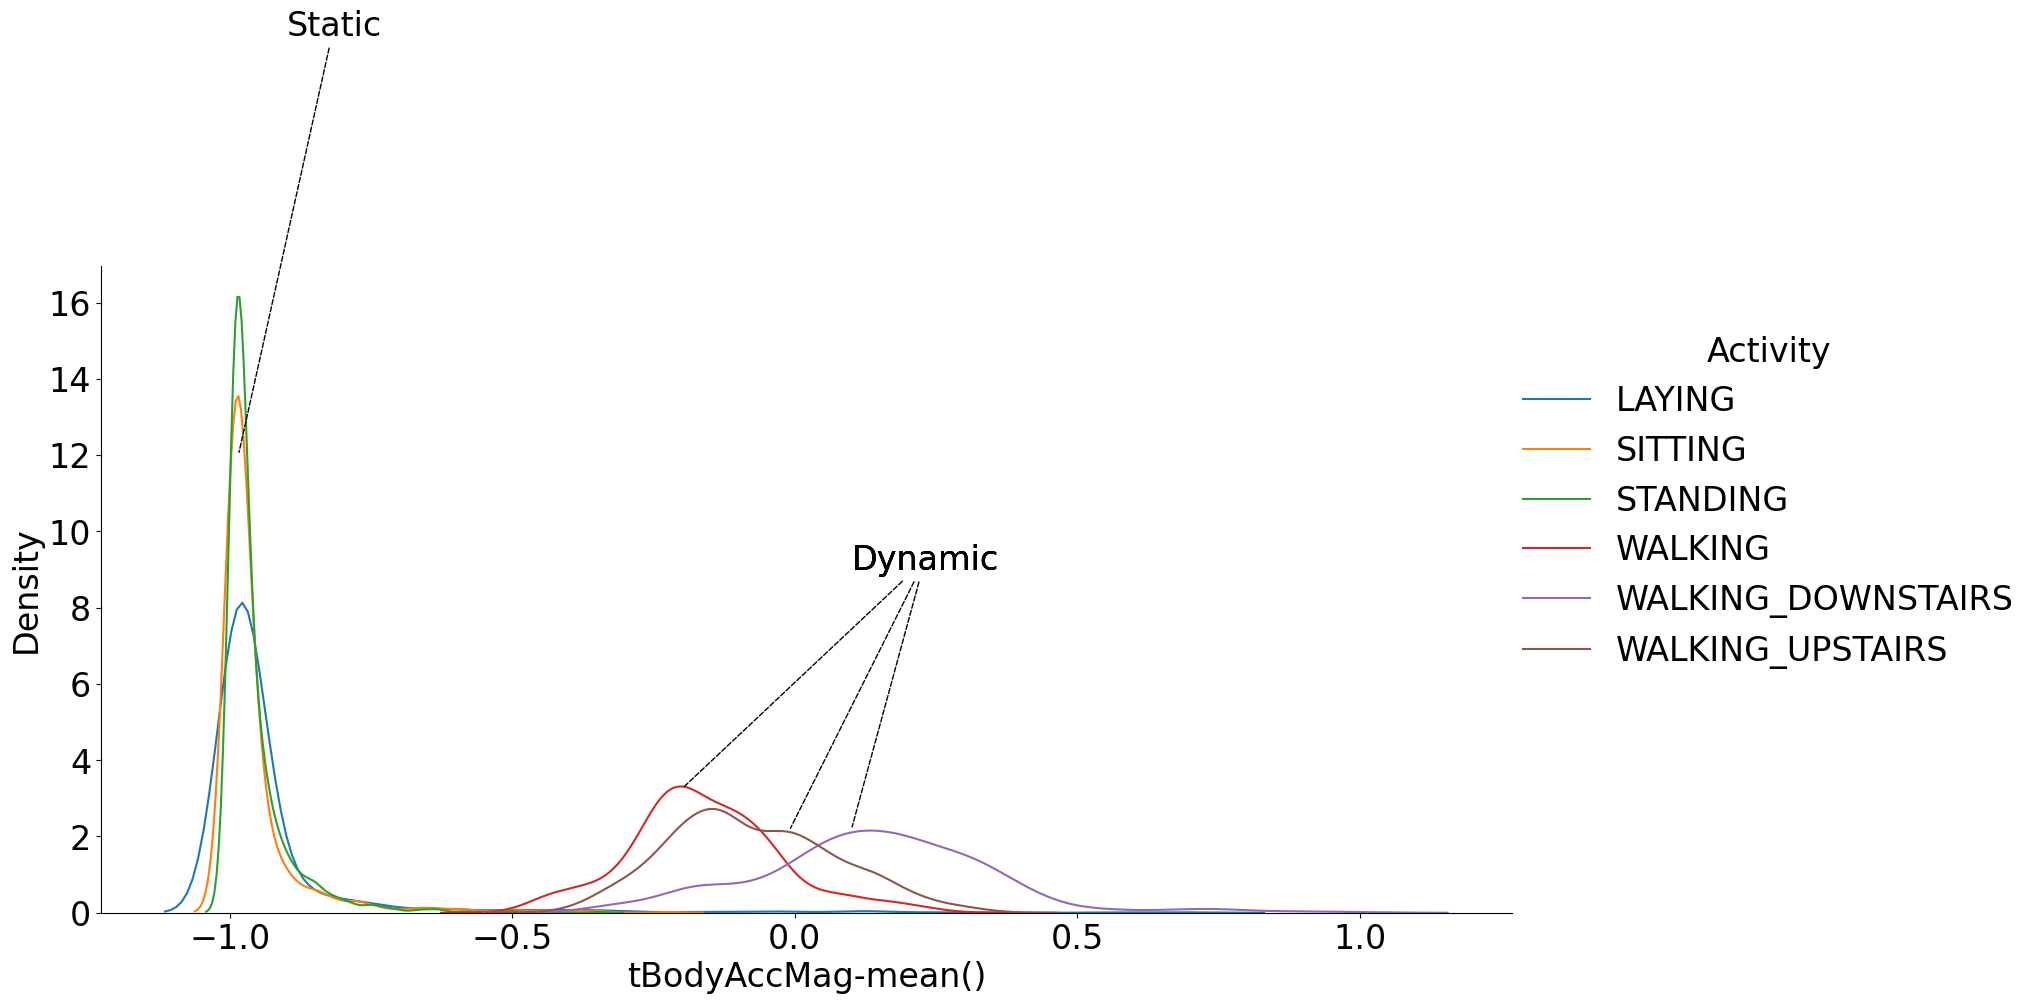

In [24]:
facetgrid = sns.FacetGrid(train_data, hue='Activity',height=8,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False).add_legend()
plt.annotate("Static",xy=(-.996,21),xytext=(-0.9,23),arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Static",xy=(-.999,26),xytext=(-0.9,23),arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Static",xy=(-0.985,12),xytext=(-0.9,23),arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Dynamic",xy=(-0.2,3.25),xytext=(0.1,9),arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Dynamic",xy=(0.1,2.18),xytext=(0.1,9),arrowprops={'arrowstyle': '-','ls':'dashed'})
plt.annotate("Dynamic",xy=(-0.01,2.15),xytext=(0.1,9),arrowprops={'arrowstyle': '-','ls':'dashed'})


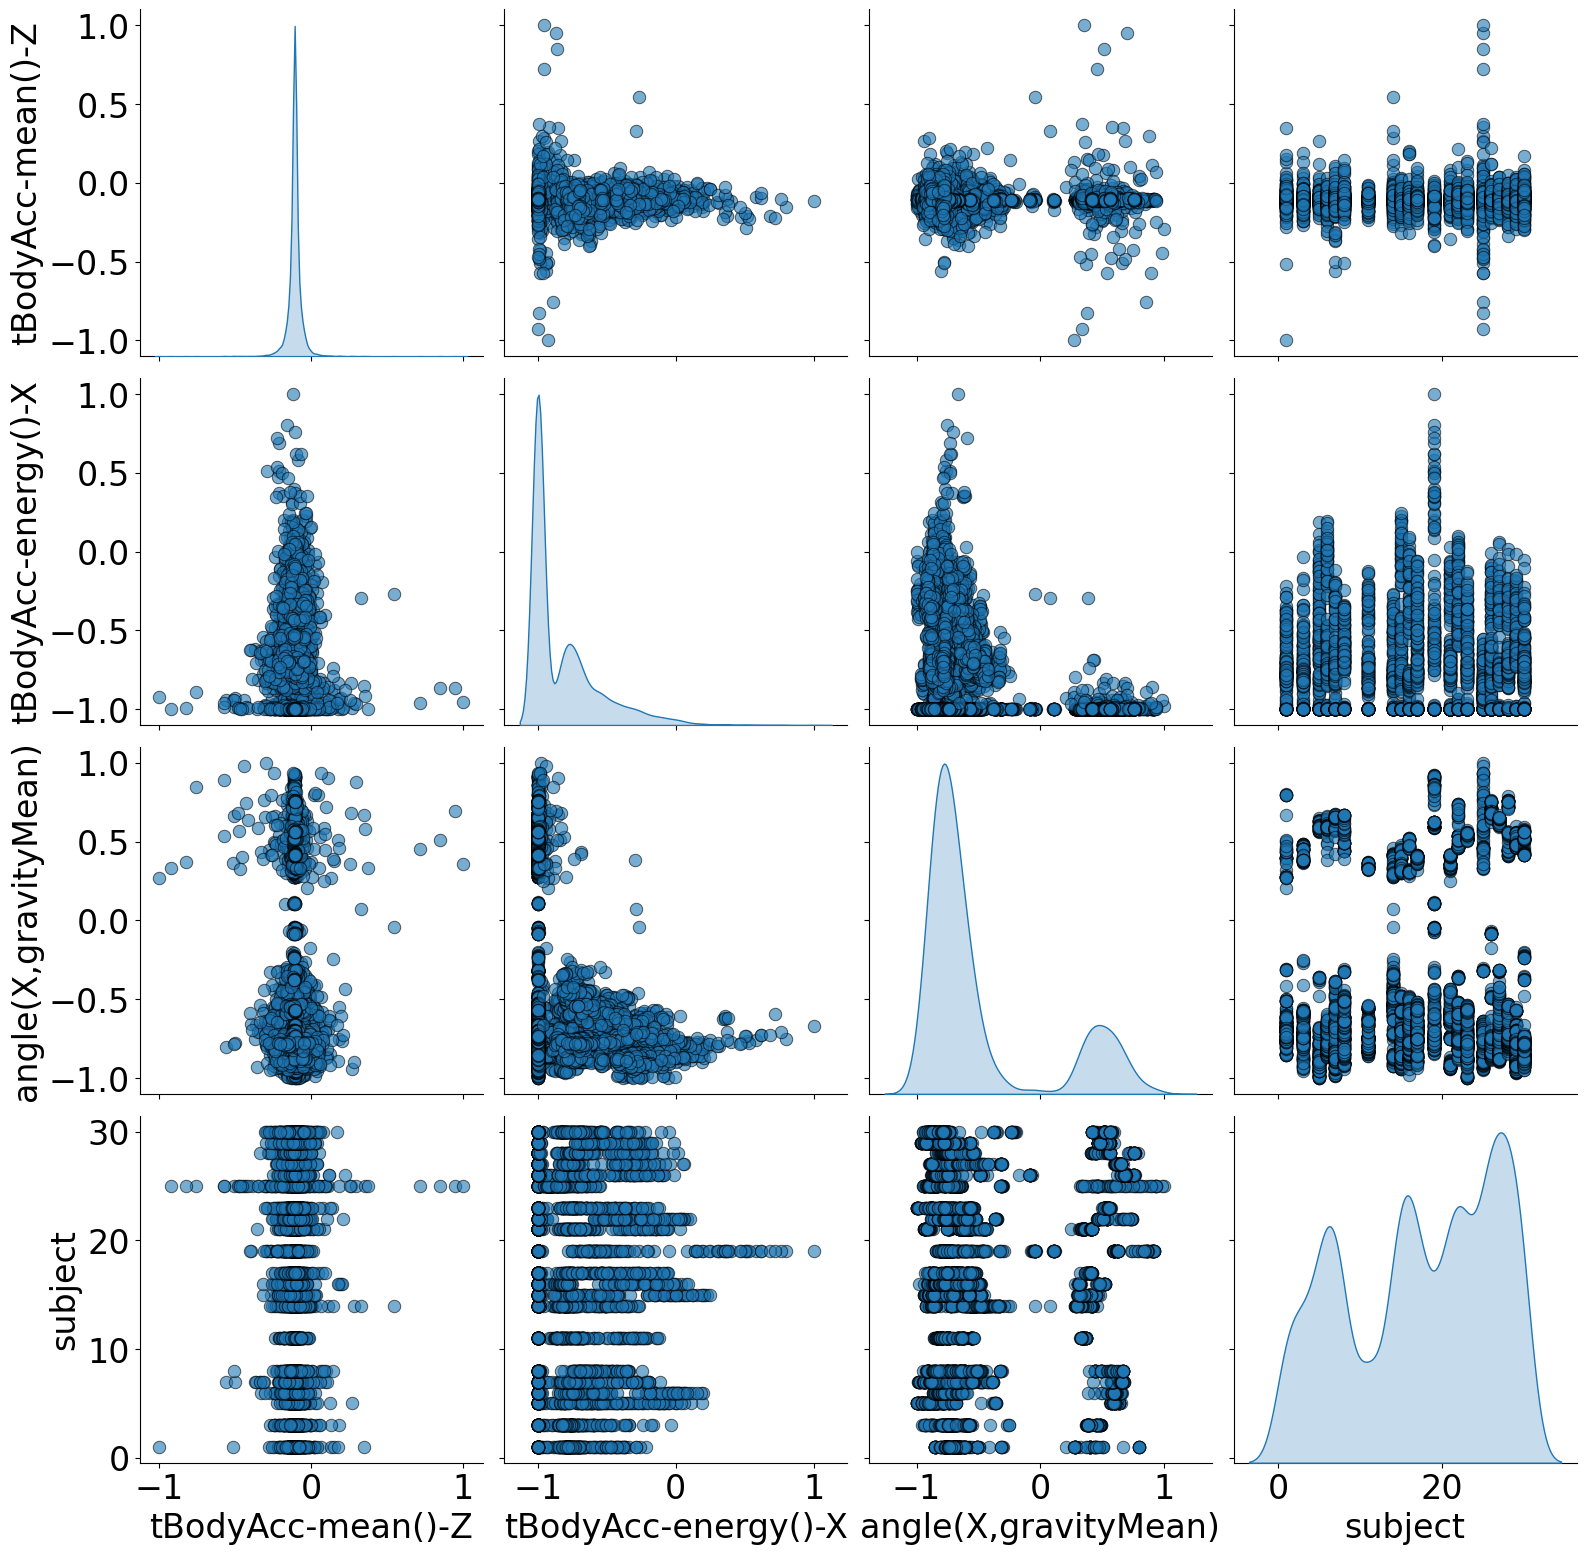

In [25]:
# columns_to_include = ['tBodyAcc-mean()-Z', 'tBodyAcc-energy()-X', 'angle(X,gravityMean)', 'subject']
# data_subset = train_data[columns_to_include]

plot = sns.pairplot(train_data[['tBodyAcc-mean()-Z', 'tBodyAcc-energy()-X', 'angle(X,gravityMean)', 'subject',]] , plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=4, diag_kind='kde')



([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'LAYING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'STANDING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

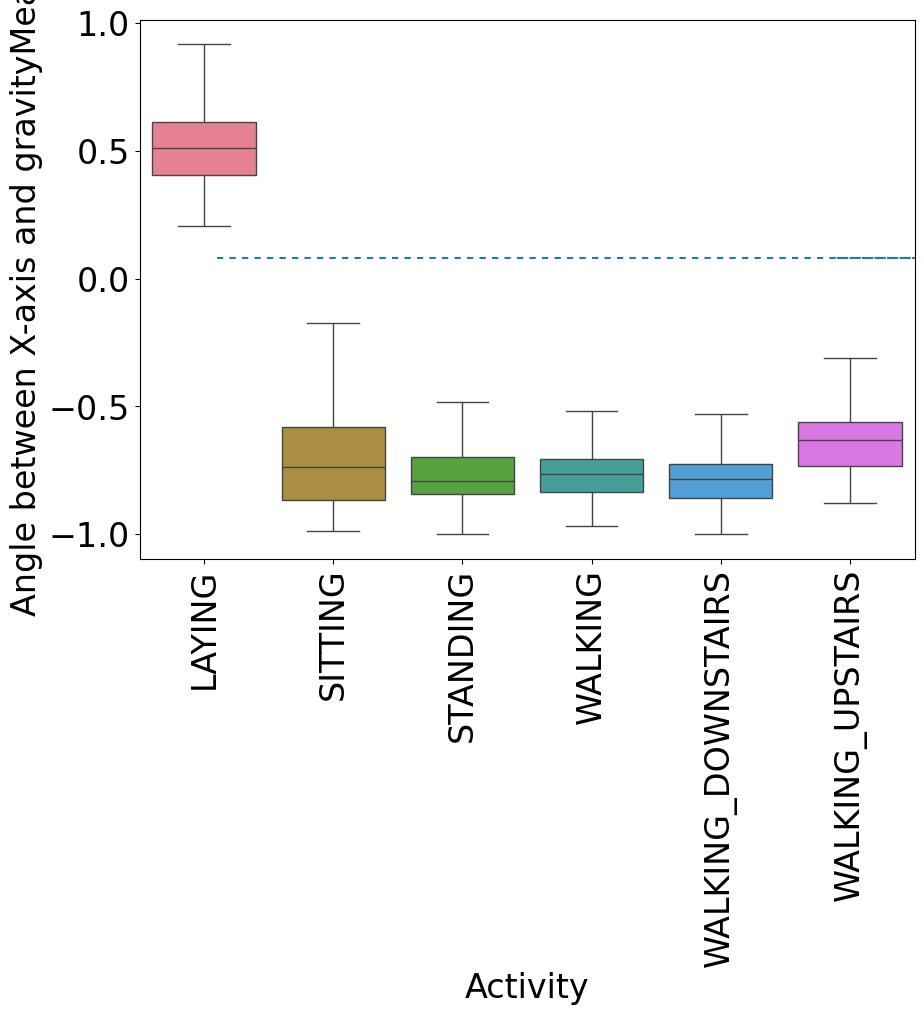

In [26]:
palette = sns.color_palette("husl", n_colors=len(train_data['Activity'].unique()))
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Activity', y = 'angle(X,gravityMean)', data = train_data, showfliers=False, palette = palette, hue = 'Activity')
plt.ylabel('Angle between X-axis and gravityMean')
plt.axhline(y=0.08,xmin=0.1,dashes=(3,3))
plt.axhline(y=0.08,xmin=0.9,dashes=(3,3))
plt.xticks(rotation = 90)

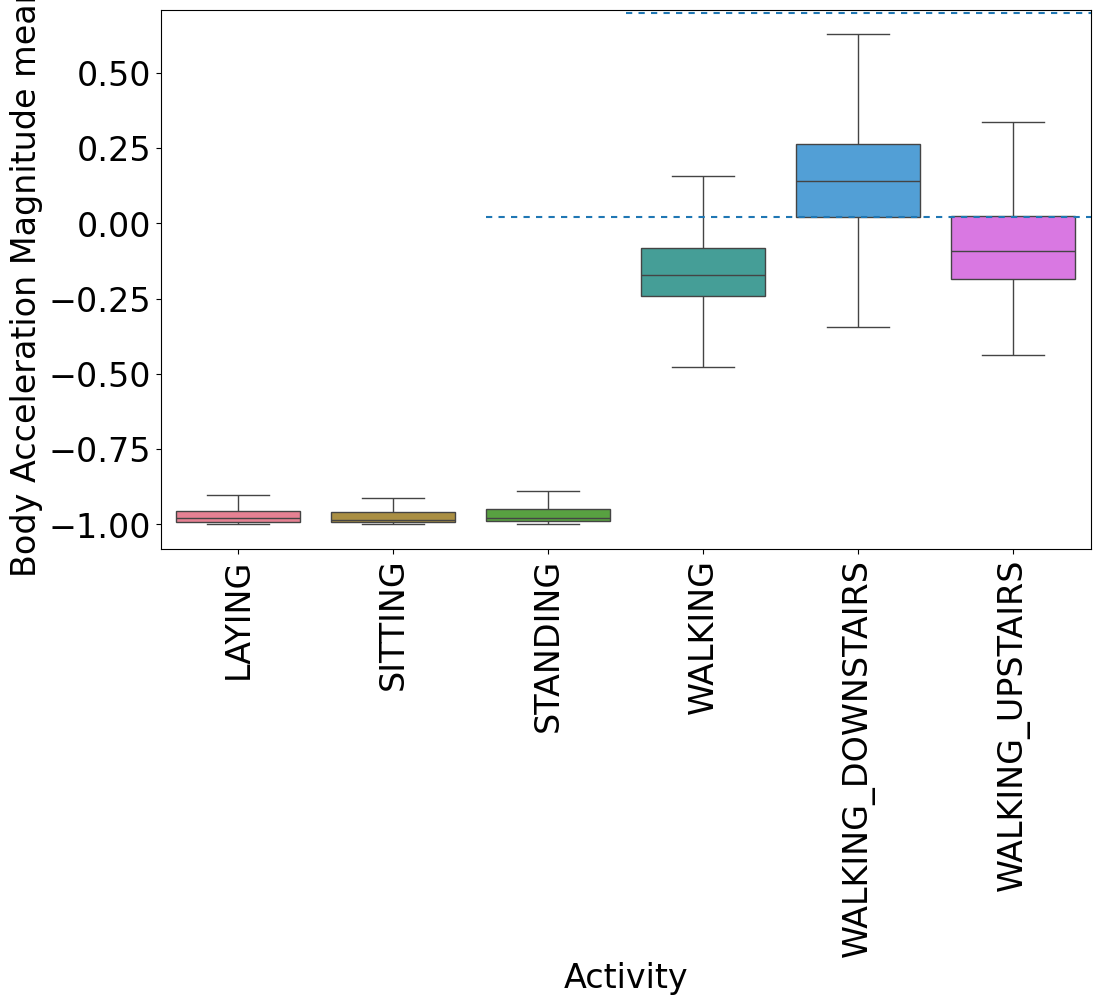

In [27]:
palette = sns.color_palette("husl", n_colors=len(train_data['Activity'].unique()))
plt.figure(figsize=(12, 7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=train_data, showfliers=False, palette=palette, hue='Activity', legend=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.axhline(y=0.7, xmin=0.5, dashes=(3, 3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3, 3))
plt.xticks(rotation=90)
plt.show()

### t-SNE Plot

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unique features. using t-SNE let's visualize it to a 2D space  

In [28]:
from sklearn.manifold import TSNE

In [29]:
X_for_tsne = train_data.drop(['subject','Activity'], axis=1)

In [30]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: total: 0 ns
Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 0.938s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.092873
[t-SNE] KL divergence after 1000 iterations: 1.295003


<Axes: >

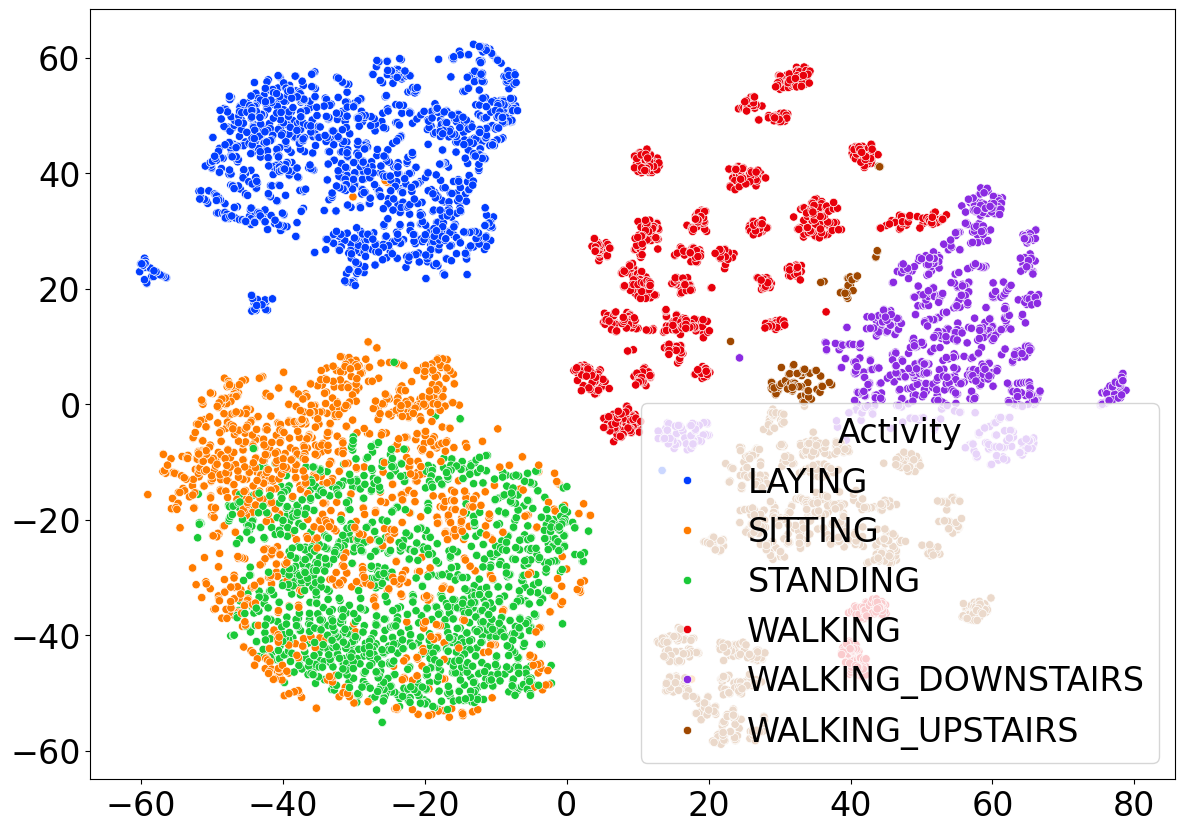

In [31]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = tsne[:, 0], y= tsne[:,1], hue = train_data['Activity'], palette = 'bright')

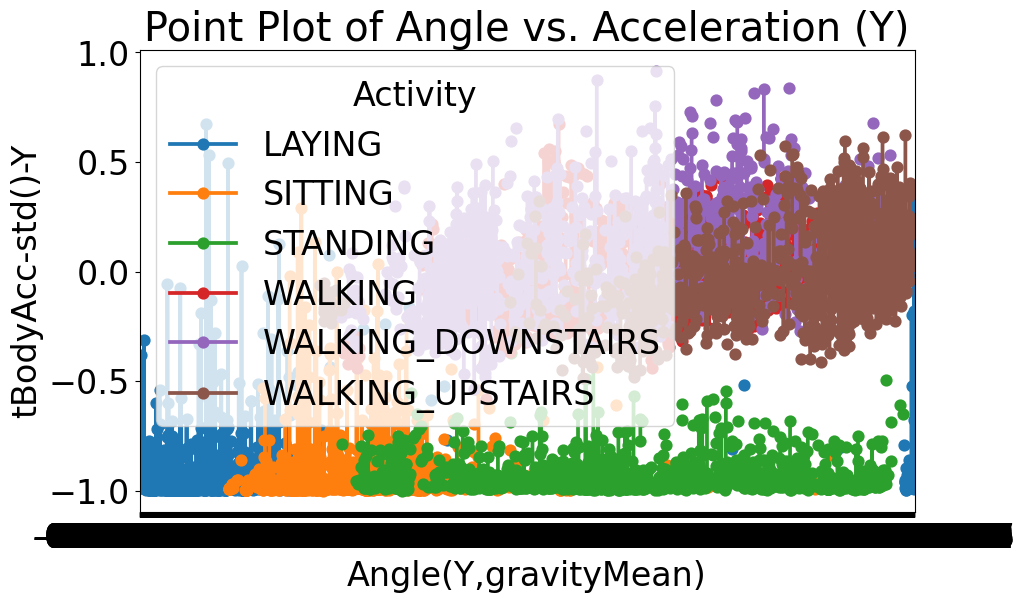

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.pointplot(x='angle(Y,gravityMean)', y='tBodyAcc-std()-Y', hue='Activity', data=train_data)

plt.title('Point Plot of Angle vs. Acceleration (Y)')
plt.xlabel('Angle(Y,gravityMean)')
plt.ylabel('tBodyAcc-std()-Y')

plt.legend(title='Activity', loc='best')  # Add a legend

plt.show()


## Data Preparation

In [33]:
temp_train = []
for i in train_data.Activity:
    if i == 'WALKING': temp_train.append(0)
    if i == 'WALKING_UPSTAIRS': temp_train.append(1)
    if i == 'WALKING_DOWNSTAIRS': temp_train.append(2)
    if i == 'SITTING': temp_train.append(3)
    if i == 'STANDING': temp_train.append(4)
    if i == 'LAYING': temp_train.append(5)
train_data['n_Activity'] = temp_train

temp_test = []
for i in test_data.Activity:
    if i == 'WALKING': temp_test.append(0)
    if i == 'WALKING_UPSTAIRS': temp_test.append(1)
    if i == 'WALKING_DOWNSTAIRS': temp_test.append(2)
    if i == 'SITTING': temp_test.append(3)
    if i == 'STANDING': temp_test.append(4)
    if i == 'LAYING': temp_test.append(5)
test_data['n_Activity'] = temp_test    

In [34]:
test_data.drop(['Activity'], axis = 1, inplace = True)
train_data.drop(['Activity'], axis = 1, inplace = True)

In [35]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_Activity'],
      dtype='object', length=563)

In [36]:
test_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_Activity'],
      dtype='object', length=563)

In [37]:
X_train = train_data.iloc[:,0:562]
X_test = test_data.iloc[:,0:562]
print(X_train.shape)

(7352, 562)


In [38]:
y_train = train_data['n_Activity']
y_test = test_data['n_Activity']
print(y_train.shape)
print(y_test.shape)

(7352,)
(2947,)


## Normalization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
scaled_train_data =scaler.transform(X_train)
scaled_test_data= scaler.transform(X_test)
scaled_train_data

array([[ 0.20064157, -0.0636826 , -0.41962845, ...,  0.40794614,
        -0.00756789, -1.8288513 ],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.40911698,
         0.00787517, -1.8288513 ],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.4102883 ,
         0.02650234, -1.8288513 ],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ...,  0.64059683,
         0.34870928,  1.4025149 ],
       [ 0.21586648, -0.02812252, -0.86770988, ...,  0.63147758,
         0.29327564,  1.4025149 ],
       [ 1.09620157,  0.12919873, -1.67268082, ...,  0.63274259,
         0.33396081,  1.4025149 ]])

## Reducing the Features - PCA

Reduction is features is required because the number of too many features present in the data PCA is one of the method to reduce the features.

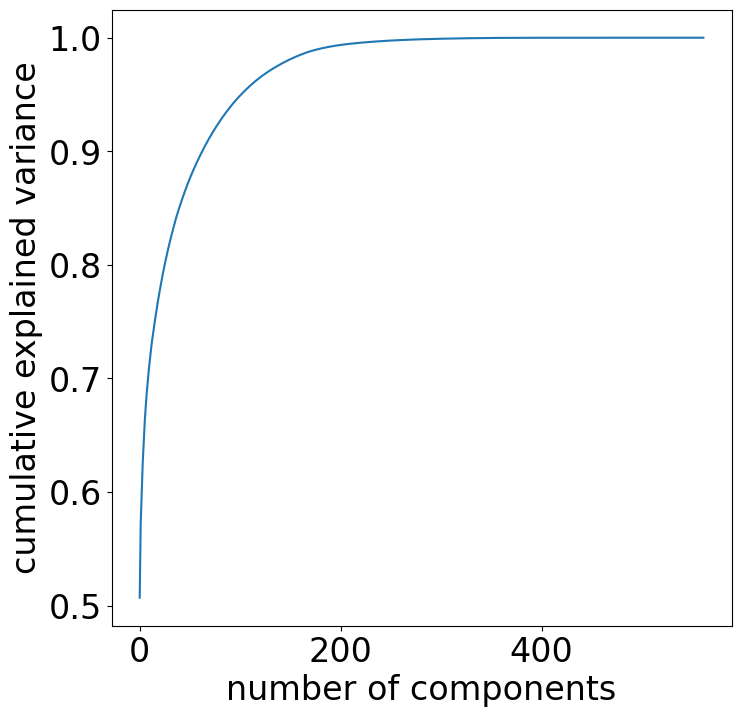

In [40]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');           

In [41]:
from sklearn.decomposition import PCA
p_c_a= PCA(n_components=200)
p_c_a.fit(scaled_train_data)
x_pca = p_c_a.transform(scaled_train_data)
x_test_pca = p_c_a.transform(scaled_test_data)

In [42]:
print(scaled_train_data.shape)
print(x_pca.shape)

(7352, 562)
(7352, 200)


## Statistical Algorithms on PCA results

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

Logistic Regression

In [44]:
clf_Logistic = LogisticRegression().fit(x_pca, y_train)
prediction_lr = clf_Logistic.predict(x_test_pca)
accuracy_score(y_test, prediction_lr)*100
print('Logistic Regression accuracy: {}%'. format(accuracy_score(y_test, prediction_lr)*100))

Logistic Regression accuracy: 93.99389209365457%


C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Classifier

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVC classifier
clf = SVC()

# Fit the classifier on your training data
clf.fit(x_pca, y_train)

# Make predictions on the test data
prediction = clf.predict(x_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.11%


Tree based , Ensemble and other ML Algorithms

Decision tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('Decision tree Classifier Accuracy: {}%' .format(accuracy_score(y_test, prediction)*100))

Decision tree Classifier Accuracy: 95.11367492365117%


Random Forest

In [47]:
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

Random Forest Classifier accuracy: 92.56871394638615%


XGBoost

In [48]:
model = XGBClassifier(n_jobs=2)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
predictions= y_pred.copy()
print('XGBoost Accuracy = {}%' .format(accuracy_score(y_test, prediction)*100))

XGBoost Accuracy = 92.56871394638615%


K Nearest Neighbors

In [49]:
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%' .format(accuracy_score(y_test, prediction)*100))

K Nearest Neighbors Classifier accuracy: 80.79402782490669%


## Deep Learning Algorithms

### ANN

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ELU
from keras.layers import Dropout

In [51]:
classifier = Sequential()
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation= 'relu', input_dim= 562))

In [52]:
classifier.add(Dense(units = 55, kernel_initializer = 'he_uniform', activation = 'relu'))

In [53]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [54]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 10)

Epoch 1/10
493/493 [==============================] - 1s 2ms/step - loss: -3835.3926 - accuracy: 0.1444 - val_loss: -13838.2529 - val_accuracy: 0.1492
Epoch 2/10
493/493 [==============================] - 1s 1ms/step - loss: -42293.5039 - accuracy: 0.1444 - val_loss: -89321.2266 - val_accuracy: 0.1492
Epoch 3/10
493/493 [==============================] - 1s 1ms/step - loss: -165247.8906 - accuracy: 0.1444 - val_loss: -278322.5625 - val_accuracy: 0.1492
Epoch 4/10
493/493 [==============================] - 1s 1ms/step - loss: -415371.2188 - accuracy: 0.1444 - val_loss: -613503.6875 - val_accuracy: 0.1492
Epoch 5/10
493/493 [==============================] - 1s 1ms/step - loss: -836467.3125 - accuracy: 0.1444 - val_loss: -1159406.8750 - val_accuracy: 0.1492
Epoch 6/10
493/493 [==============================] - 1s 1ms/step - loss: -1473652.2500 - accuracy: 0.1444 - val_loss: -1956215.5000 - val_accuracy: 0.1492
Epoch 7/10
493/493 [==============================] - 1s 1ms/step - loss: -240

## Hyper Parameter Tuning - ANN

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim = X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(units = 6, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))
    
    model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose=0)

layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grids = dict(layers= layers, activation = activations, batch_size = [128,256], epochs = [30])
grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = 5)

C:\Users\ramesh narwade\AppData\Local\Temp\ipykernel_13148\1709827194.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose=0)


In [57]:
grid_result = grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

[0.9279150128364563,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (40, 20)}]

In [58]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ['linear', 'rbf', 'ploy', 'sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}
selector = GridSearchCV(SVC(), parameters, scoring = 'accuracy')
selector.fit(X_train, y_train)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' %(mean, std == 2, params))
    print()

C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python

Best parameter set found:
{'C': 1, 'kernel': 'linear'}
Detailed grid scores:
0.931 (+/-0.000) for {'C': 100, 'kernel': 'linear'}

0.888 (+/-0.000) for {'C': 100, 'kernel': 'rbf'}

nan (+/-0.000) for {'C': 100, 'kernel': 'ploy'}

0.216 (+/-0.000) for {'C': 100, 'kernel': 'sigmoid'}

0.931 (+/-0.000) for {'C': 50, 'kernel': 'linear'}

0.888 (+/-0.000) for {'C': 50, 'kernel': 'rbf'}

nan (+/-0.000) for {'C': 50, 'kernel': 'ploy'}

0.215 (+/-0.000) for {'C': 50, 'kernel': 'sigmoid'}

0.933 (+/-0.000) for {'C': 20, 'kernel': 'linear'}

0.888 (+/-0.000) for {'C': 20, 'kernel': 'rbf'}

nan (+/-0.000) for {'C': 20, 'kernel': 'ploy'}

0.221 (+/-0.000) for {'C': 20, 'kernel': 'sigmoid'}

0.936 (+/-0.000) for {'C': 1, 'kernel': 'linear'}

0.885 (+/-0.000) for {'C': 1, 'kernel': 'rbf'}

nan (+/-0.000) for {'C': 1, 'kernel': 'ploy'}

0.221 (+/-0.000) for {'C': 1, 'kernel': 'sigmoid'}

0.936 (+/-0.000) for {'C': 0.1, 'kernel': 'linear'}

0.801 (+/-0.000) for {'C': 0.1, 'kernel': 'rbf'}

nan (+/-0.00

## Algorithm Comparison

In [59]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(7),
    SVC(),
    LogisticRegression(),
    RandomForestClassifier()
]

In [60]:
names= []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))
score_df = pd.DataFrame({'Model': names, 'Scores': scores}).set_index('Model')
score_df
    

C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Scores
Model,
DecisionTreeClassifier,0.861554
KNeighborsClassifier,0.806583
SVC,0.930777
LogisticRegression,0.952494
RandomForestClassifier,0.927384


## More Evaluation Parameters

Text(0.5, 1.0, 'Confussion Matrix')

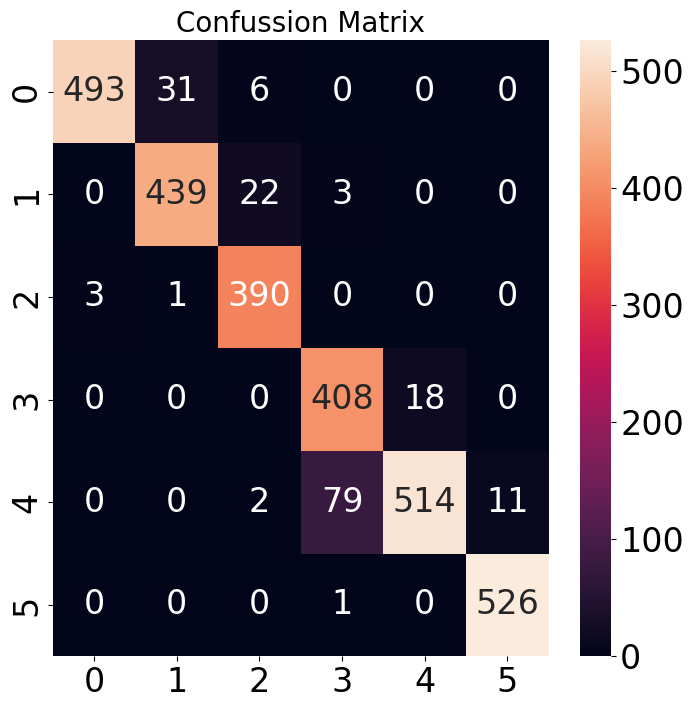

In [61]:
cm = confusion_matrix(prediction_lr, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Confussion Matrix', fontsize = 20)

In [62]:
cr = classification_report(y_test, prediction_lr)
print('Classification report >>> \n', cr)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       496
           1       0.95      0.93      0.94       471
           2       0.99      0.93      0.96       420
           3       0.96      0.83      0.89       491
           4       0.85      0.97      0.90       532
           5       1.00      0.98      0.99       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [63]:
data = X_test[:1]

In [64]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2


## FLASK API

In [65]:
import joblib
clf_logistic = LogisticRegression()
clf_logistic.fit(X_train, y_train)
joblib.dump(clf_logistic, 'logistic_regression_model.pkl')

C:\Users\ramesh narwade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [66]:
# from flask import Flask
# import requests
# from flask import request 
# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json()
#     data1 = json_normalize(data)
#     scaled_datascaler.transform(data)
    
#     x_pcasp_c_a.transform(scaled_data)
    
#     clf = joblib.load('./logistic_regression_model.pkl')
#     return str(clf.predict(x_pca))

# # if__name__ == "__main__":
# #     clf = joblib.load('./logistic_regression_model.pkl')
# #     app.run(debug= False, host = '0.0.0.0', port = 5000)

# if __name__ == "__main__":
#     clf = joblib.load('./logistic_regression_model.pkl')
#     app.run(debug=False, host='0.0.0.0', port=5000)


In [ ]:
from flask import Flask, request, jsonify
import requests
from pandas import json_normalize  # Import json_normalize from pandas

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    
    # Assuming you have defined and fitted your scaler as `scaled_data_scaler`
    scaled_data = scaled_data_scaler.transform(data)
    
    # Assuming `x_pcasp_c_a` is defined correctly
    transformed_data = x_pcasp_c_a.transform(scaled_data)
    
    clf = joblib.load('./logistic_regression_model.pkl')
    prediction = clf.predict(transformed_data)
    
    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction.tolist()})

if __name__ == "__main__":
    clf = joblib.load('./logistic_regression_model.pkl')
    app.run(debug=False, host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.164.253:5000
Press CTRL+C to quit
